In [9]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import metrics

data = pd.read_csv('data/googleplaystore.csv')
data = data.dropna()
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 950.8+ KB


In [10]:
import collections
def categoryTransform(d):
    CategoryString = d["Category"]
    categoryVal = d["Category"].unique()
    categoryValCount = len(categoryVal)
    category_dict = {}
    for i in range(0, categoryValCount):
        category_dict[categoryVal[i]] = i
    print(category_dict)
    d["Category_i"] = d["Category"].map(category_dict).astype(int)

def newInstallsTrans(d):
    CategoryString = d["Installs"]
    categoryVal = d["Installs"].unique()
    categoryVal = sorted(categoryVal)
    categoryValCount = len(categoryVal)
    category_dict = dict()
    for i in range(0, categoryValCount):
        category_dict[categoryVal[i]] = i
    print(category_dict)
    #d["Installs"] = d["Installs"].map(category_dict).astype(int)
    
def size_trans(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None
    
def sizeTransform(d):
    d["Size"] = d["Size"].map(size_trans)
    data.Size.fillna(method = 'ffill', inplace = True)
    
def installs_trans(inst):
    try:
        x = (inst[:-1].replace(",",""))
        x = int(x)
        #return x
    except ValueError:
        print("Line is corrupt!", x)
        x = 0
    return x
def installsTransform(d):
    d["Installs"] = d["Installs"].map(installs_trans)

def type_trans(types):
    if types == 'Free':
        return 0
    else:
        return 1
def typeTransfor(d):
    d["Type"] = d["Type"].map(type_trans)

def ratingTransform(d):
    RatingL = d["Content Rating"].unique()
    RatingDict = {}
    for i in range(len(RatingL)):
        RatingDict[RatingL[i]] = i
    print(RatingDict)
    d["Content Rating"] = d["Content Rating"].map(RatingDict).astype(int)

def genreTranform(d):
    GenresL = d.Genres.unique()
    GenresDict = {}
    for i in range(len(GenresL)):
        GenresDict[GenresL[i]] = i
    print(GenresDict)
    d["Genres_i"] = d["Genres"].map(GenresDict).astype(int)
    
def price_trans(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        if price == "veryone":
            price = 0
        price = float(price)
        return price
def priceTransform(d):
    d["Price"] = d["Price"].map(price_trans).astype(float)
    
def review_trans(rev):
    if 'M' in rev:
        x = rev[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == rev[-1:]:
        x = rev[:-1]
        x = float(x)*1000
        return(x)
    else:
        return rev
def reviewTrans(d):
    d["Reviews"] = d["Reviews"].map(review_trans).astype(float)
def name_size(name):
    return len(name.split())
def nameSize(d):
    d["NameSize"] = d["App"].map(name_size).astype(int)

In [11]:
def transformData(d):
    categoryTransform(d)
  
    sizeTransform(d)
    installsTransform(d)
    newInstallsTrans(d)
    typeTransfor(d)
    ratingTransform(d)
    genreTranform(d)
    priceTransform(d)
    reviewTrans(d)
    nameSize(d)
    d.drop(labels = ["Genres","Category","Last Updated","Current Ver", 'Android Ver', 'App'], axis = 1, inplace = True)
    d.info()
    
transformData(data)
data.head()

{'ART_AND_DESIGN': 0, 'AUTO_AND_VEHICLES': 1, 'BEAUTY': 2, 'BOOKS_AND_REFERENCE': 3, 'BUSINESS': 4, 'COMICS': 5, 'COMMUNICATION': 6, 'DATING': 7, 'EDUCATION': 8, 'ENTERTAINMENT': 9, 'EVENTS': 10, 'FINANCE': 11, 'FOOD_AND_DRINK': 12, 'HEALTH_AND_FITNESS': 13, 'HOUSE_AND_HOME': 14, 'LIBRARIES_AND_DEMO': 15, 'LIFESTYLE': 16, 'GAME': 17, 'FAMILY': 18, 'MEDICAL': 19, 'SOCIAL': 20, 'SHOPPING': 21, 'PHOTOGRAPHY': 22, 'SPORTS': 23, 'TRAVEL_AND_LOCAL': 24, 'TOOLS': 25, 'PERSONALIZATION': 26, 'PRODUCTIVITY': 27, 'PARENTING': 28, 'WEATHER': 29, 'VIDEO_PLAYERS': 30, 'NEWS_AND_MAGAZINES': 31, 'MAPS_AND_NAVIGATION': 32}
{1: 0, 5: 1, 10: 2, 50: 3, 100: 4, 500: 5, 1000: 6, 5000: 7, 10000: 8, 50000: 9, 100000: 10, 500000: 11, 1000000: 12, 5000000: 13, 10000000: 14, 50000000: 15, 100000000: 16, 500000000: 17, 1000000000: 18}
{'Everyone': 0, 'Teen': 1, 'Everyone 10+': 2, 'Mature 17+': 3, 'Adults only 18+': 4, 'Unrated': 5}
{'Art & Design': 0, 'Art & Design;Pretend Play': 1, 'Art & Design;Creativity': 2, 

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Category_i,Genres_i,NameSize
0,4.1,159.0,19000000.0,10000,0,0.0,0,0,0,9
1,3.9,967.0,14000000.0,500000,0,0.0,0,0,1,3
2,4.7,87510.0,8700000.0,5000000,0,0.0,0,0,0,10
3,4.5,215644.0,25000000.0,50000000,0,0.0,1,0,0,5
4,4.3,967.0,2800000.0,100000,0,0.0,0,0,2,7


In [12]:
fieldsIndex = {"Rating":0,"Reviews":1,"Size":2,"Installs":3,"Type":4,"Price":5,"Content Rating":6,"Category_i":7,"Genres_i":8}


In [14]:
alpha = 0.005
def h(x, Theta):
    return np.dot(x, np.transpose(Theta))

def coste(X, Y, Theta):
    H = h(X, Theta)
    Aux = (H - Y) ** 2
    return (Aux.sum() / (2 * len(X)))

def descenso_gradiente(x, y, times):
    theta = np.zeros([1, 2], dtype = float)
    print(theta)
    c = np.zeros([times, 2], dtype = float)

    for i in range(times):
        H = h(x, theta)
        aux0 = theta[0][0] - alpha*np.sum((H-y))*(1/m)
        aux1 = theta[0][1] - alpha*np.sum((H-y)*x)*(1/m)
        theta[0][0] = aux0
        theta[0][1] = aux1
        c[i] = coste(x, y, theta)
    return [theta, c]
#X = np.transpose(X)

Theta = descenso_gradiente(X, Y,500)

plt.plot(X[:, 1:], h(X, Theta[0]))


[[0. 0.]]


ValueError: PandasArray must be 1-dimensional.

In [15]:
import sys
class Normalization:
    """
    Regression Normalization (adding the one columns)
    """
    
    @staticmethod
    def normalize_data_set(X):
        """
        Normalize the given matrix (data set) using the mean and deviation of every column (attribute).
        Returns the normalized matrix, the mu vector (mean of every attribute) and sigma vector (deviation of every attribute).
        """
        n = np.shape(X)[1]
        X_norm = np.empty_like(X)
        sigma = np.empty(n)
        mu = np.empty(n)

        for i in range(0, n):
            mu[i] = np.mean(X[:, i]) #mean of every column or attribute
            sigma[i] = np.std(X[:, i]) #deviation of every column or attribute

            new_value = (X[:, i] - mu[i])/sigma[i] #normalize
            X_norm[:, i] = new_value

        X_norm = np.hstack([np.ones([np.shape(X)[0], 1]), X_norm]) #convention in linear regr

        return X_norm, mu, sigma

    @staticmethod
    def normalize_single_attributes(attributes, mu, sigma):
        """
        Normalize a single set of different attributes using mu and sigma vectors obtained in a
        previous normalization 
        """
        new_data = (attributes - mu[:])/sigma[:] #normalize
        new_data = np.hstack([[1], new_data]) #convention in linear regr
        return new_data

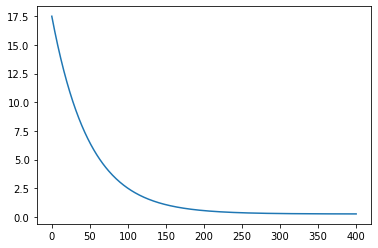

ValueError: x and y must be the same size

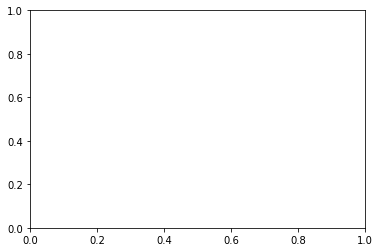

In [28]:
learning_rate = 0.005
import seaborn as sns
def h(x, _theta):
    """
    H = O^T * X
    """
    return (np.dot(x, np.transpose(_theta))) #scalar product

def J(X, Y, _theta):
    """
    Cost function
    """
    m = np.shape(X)[0]
    return 1/(2*m) * np.sum((h(X, _theta) - Y)**2)

def minimize(X, Y, m, n, _theta):
    """
    Minimize using the given formulas
    """
    H = h(X, _theta)
    for i in range(n + 1):
        columnX = np.reshape(X[:, i], (m, 1)) #X[:, i] devuleve una fila con los datos de la columna, hay que hacer reshape para que devuelva los datos en filas separadas 
        aux = np.sum((H - Y) * columnX) 
        _theta[0, i] = _theta[0][i] - learning_rate*(1/m) * aux

def make_paint_data(X, Y):
    """
    Slide's code
    """
    step= 0.1
    Theta0 = np.arange(-10, 10, step)
    Theta1 = np.arange(-1, 4, step)
    X_aux = np.hstack([np.ones([np.shape(X)[0], 1]), X])

    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)

    coste = np.empty_like(Theta0)

    for ix, iy in np.ndindex(Theta0.shape):
        coste[ix, iy] = J(X_aux, Y, [Theta0[ix, iy], Theta1[ix, iy]])

    return Theta0, Theta1, coste

def draw_points_plot(X, Y, _theta):
    """
    Draw linear function with X points
    """
    plt.figure()
    plt.scatter(X[:,1:], Y[:,1:], 1, "red")
    plt.plot(X[:,1:], h(X, _theta), color="grey")
    plt.show()

def draw_cost_3D(X, Y, Z):
    """
    Draw 3D cost 
    """
    fig = plt.figure()
    ax = fig.gca(projection='3d') 

    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)  

    fig.colorbar(surf, shrink =0.5, aspect=5)
    plt.show()

def draw_contour(X, Y, Z):
    """
    Draw the contour
    """
    plt.figure()
    plt.contour(X, Y, Z)
    plt.show()

def draw_cost(cost):
    """
    Draw the linear progression of the cost
    """
    plt.figure()
    X = np.linspace(0, 400, len(cost))
    plt.plot(X, cost)
    plt.show()
    
def gradient_descent_loop(X, Y, m, n):
    """
    Gradient descent. Minimize till convergence
    """
    theta = np.zeros([1, n + 1], dtype=float)
    cost = np.array([], dtype=float)
    auxCost = sys.maxsize
    while True:
        minimize(X, Y, m, n, theta)
        cost = np.append(cost, J(X, Y, theta))
        if abs(auxCost - cost[-1]) < 1e-4:
            break #Stops the loop when we reach the convergence value of 10^-4
        auxCost = cost[-1]
    
    return theta, cost



number = 9360
Y = np.array([])

np.shape(Y)
Y = np.reshape(Y, (number, 0))
Y = data.Rating
Y = np.c_[Y,data["Rating"].array]
masde1 = 1
if masde1:
    X = np.array([])

    X = np.reshape(X, (len(Y), 0))
    X = np.c_[X,data["Installs"]]
    #X = np.c_[X,data["Installs"].array]
    X = np.c_[X,data["Genres_i"].array]
    
else:
    X = data['Reviews'].array
X_norm, mu, sigma = Normalization.normalize_data_set(X)
n = np.shape(X)[1]
m = np.shape(X)[0]
theta, cost = gradient_descent_loop(X_norm, Y, m, n)
draw_cost(cost)
draw_points_plot(X_norm, Y, theta)

#sns.regplot(X,Y,color='teal', label = 'Integer', marker = 'x')

#A, B, Z = make_paint_data(X, Y)
#draw_cost_3D(A, B, Z)
#draw_contour(A, B, Z)

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import seaborn as sns

X = data.drop(labels = ['Price','Category_i','Type','Content Rating','Rating','Size','Installs','Genres_i','NameSize'],axis = 1)
y = data.Rating
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)
#sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')

#sns.regplot(X_train,y_train,color='teal', label = 'Integer', marker = 'x')
sns.regplot(X,y,color='teal', label = 'Integer', marker = 'x')

print(y)


